In [3]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [5]:
df = pd.read_json('../data/scores-mean.json', lines=True)

In [6]:
df.head(10)

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS
0,1673099,0.646,2406546,129161,0.050,0.095958,A,525900,107,35.142758,-91.778855,43,Garner town,284,AR
1,50843469,19.631,2630708,0,0.000,0.187768,S,653224,1575,33.527515,-116.126104,57,Oasis CDP,6890,CA
2,10824804,4.179,2407067,17913241,6.916,0.665166,A,1254025,9091,26.685819,-80.037211,43,Palm Beach town,8348,FL
3,4278931,1.652,2398235,0,0.000,0.225261,A,1732564,803,41.555683,-90.403359,47,Hampton village,1863,IL
4,589068,0.227,2394290,0,0.000,0.048965,A,1934365,52,42.757750,-93.104094,25,Hansell city,98,IA
5,5267333,2.034,2629686,13221,0.005,0.031884,S,2174586,144,36.884106,-85.710944,57,Summer Shade CDP,307,KY
6,5262457,2.032,2583755,2353,0.001,0.017165,S,2659320,88,45.231860,-85.380956,57,Norwood CDP,142,MI
7,908212,0.351,2409827,0,0.000,0.029487,A,3005275,295,47.387406,-110.927810,43,Belt town,597,MT
8,7159568,2.764,885298,6323,0.002,4.588236,A,3445690,5440,40.542445,-74.362767,21,Metuchen borough,13574,NJ
9,11152732,4.306,2405124,0,0.000,0.060979,A,3700500,2309,36.284339,-76.990146,43,Ahoskie town,5039,NC


In [7]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [8]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [9]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [10]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.USPS==state]
    plot_point_collection(ax, sdf.point, sdf.DENSITY, markersize=sdf['POP10'] / 200, alpha=1, cmap='Reds', edgecolor='black')

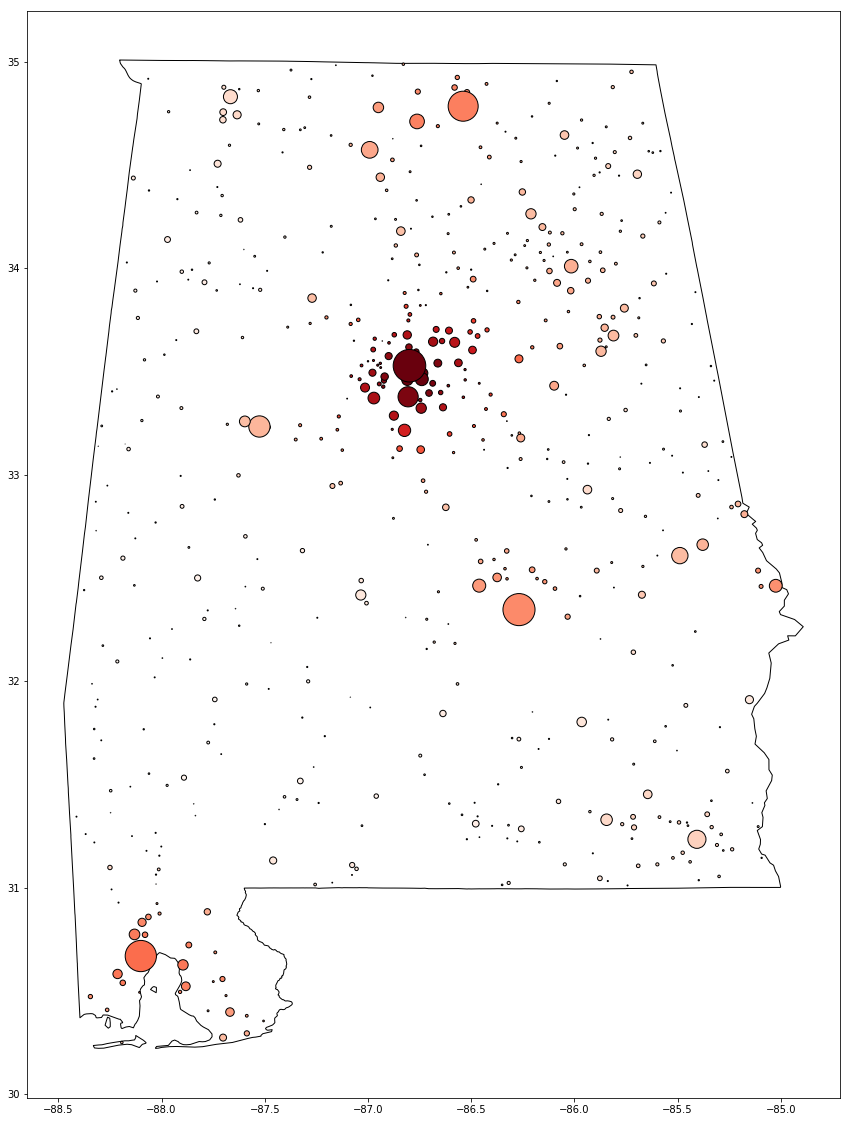

In [11]:
plot_state('AL')

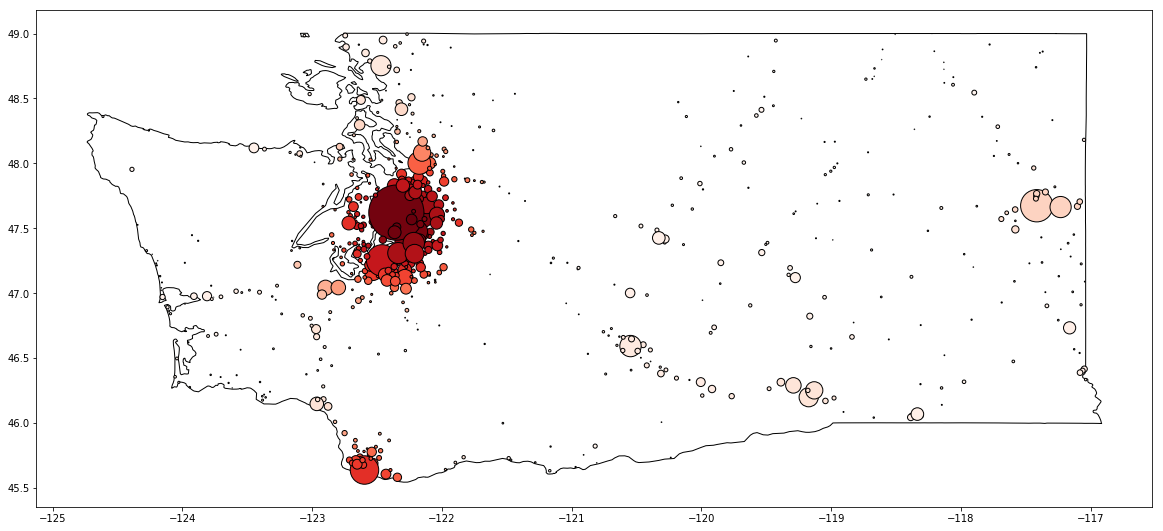

In [12]:
plot_state('WA')

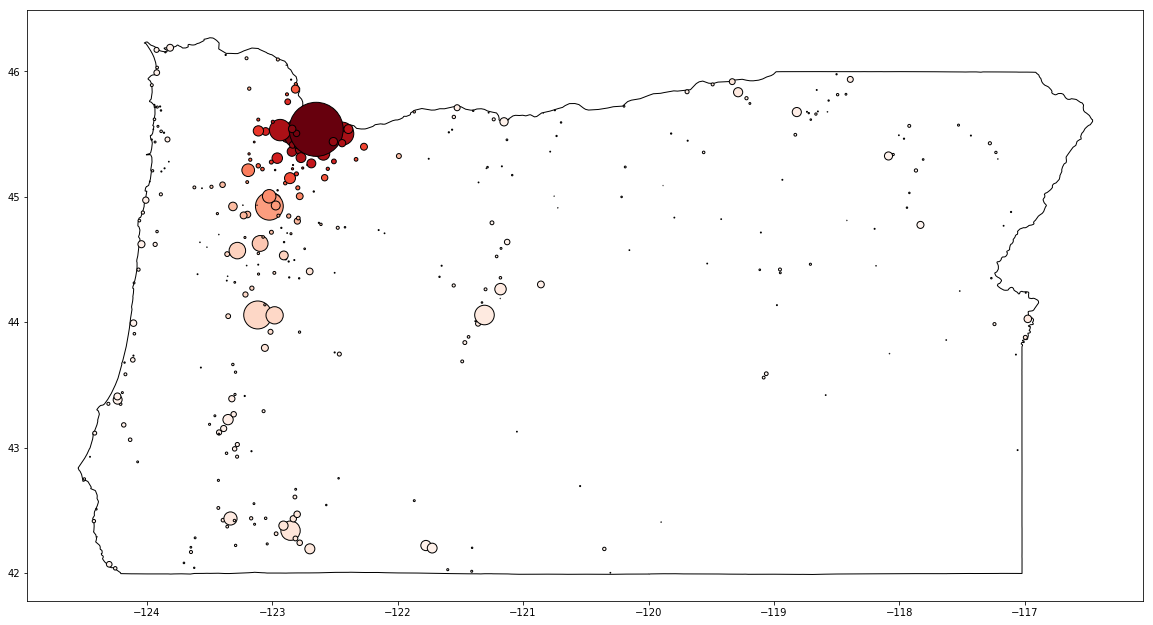

In [13]:
plot_state('OR')

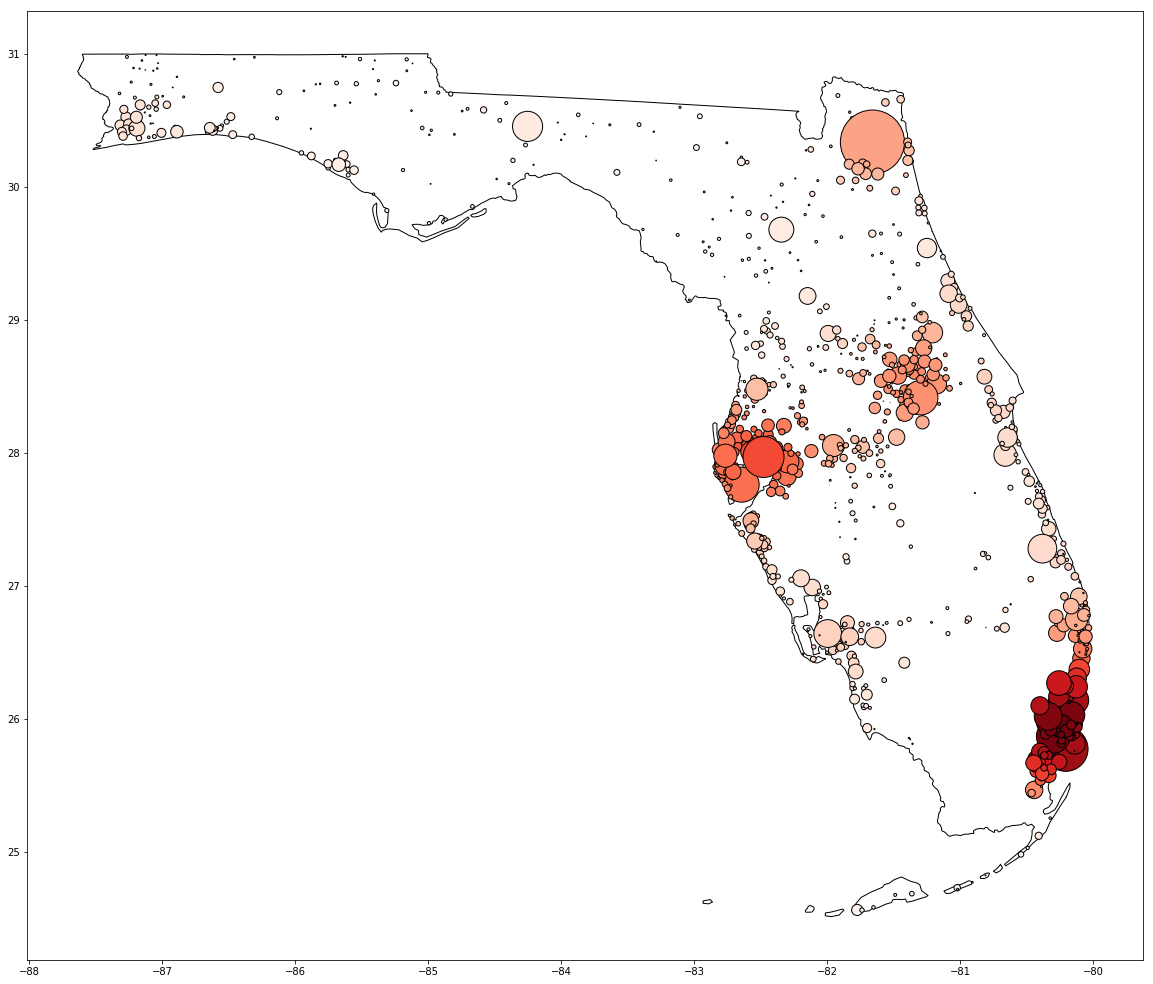

In [14]:
plot_state('FL')

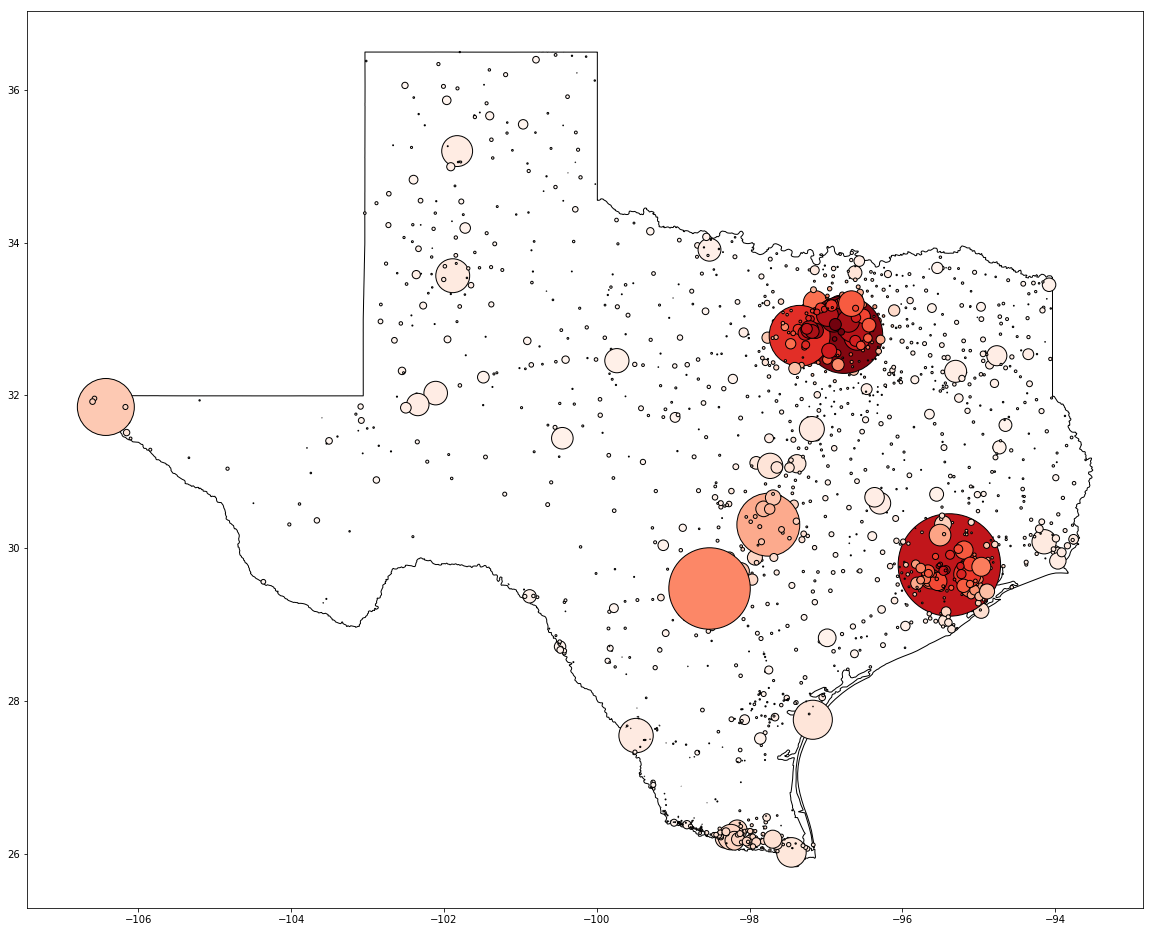

In [15]:
plot_state('TX')

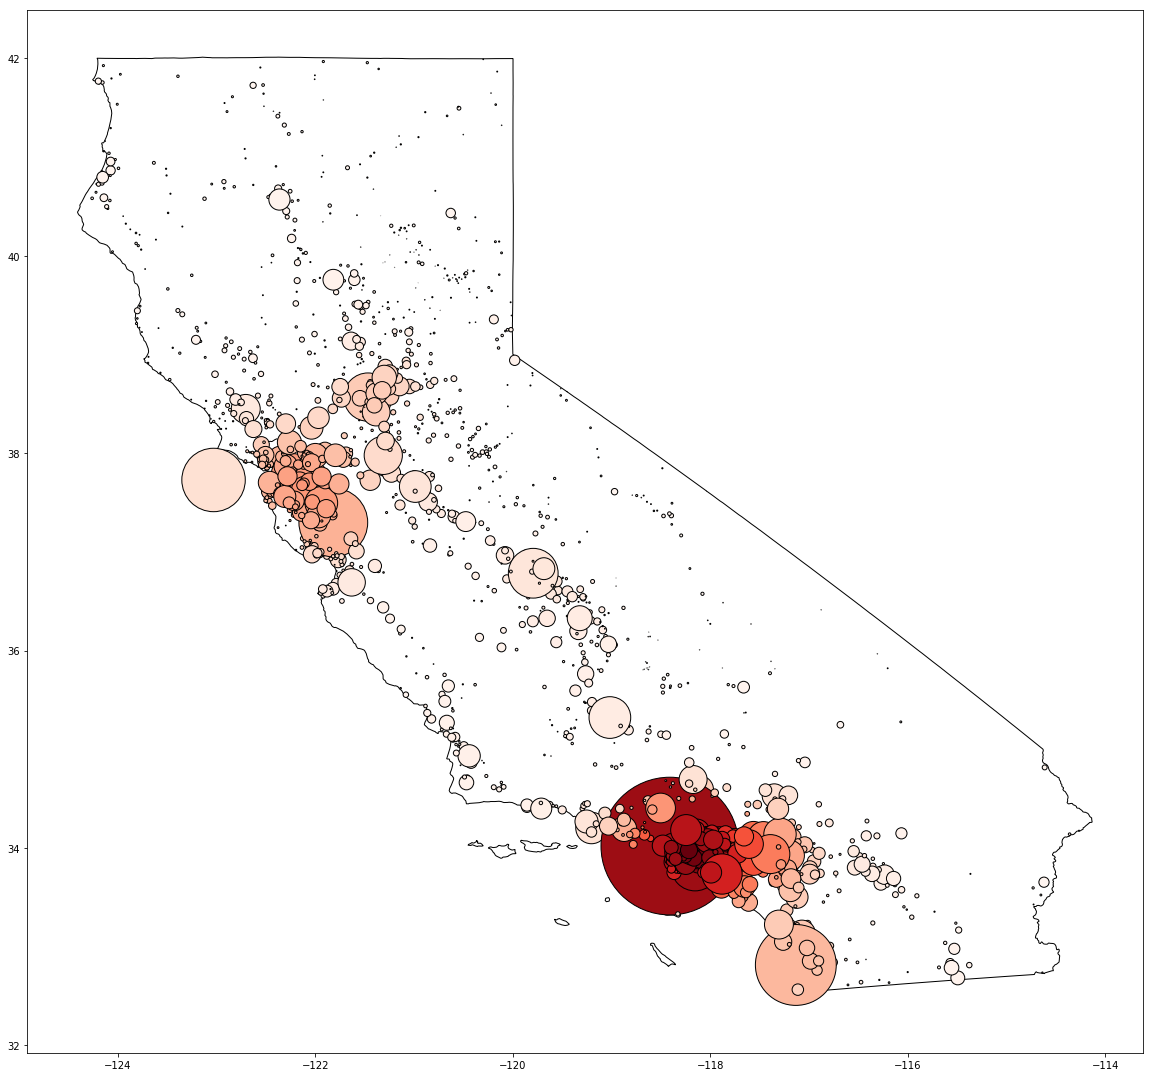

In [16]:
plot_state('CA')

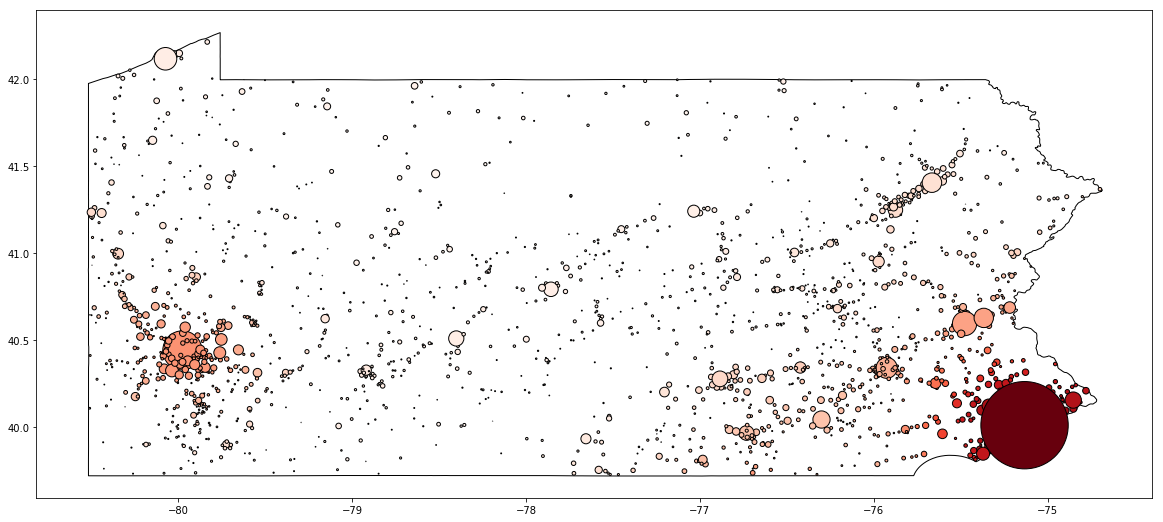

In [17]:
plot_state('PA')

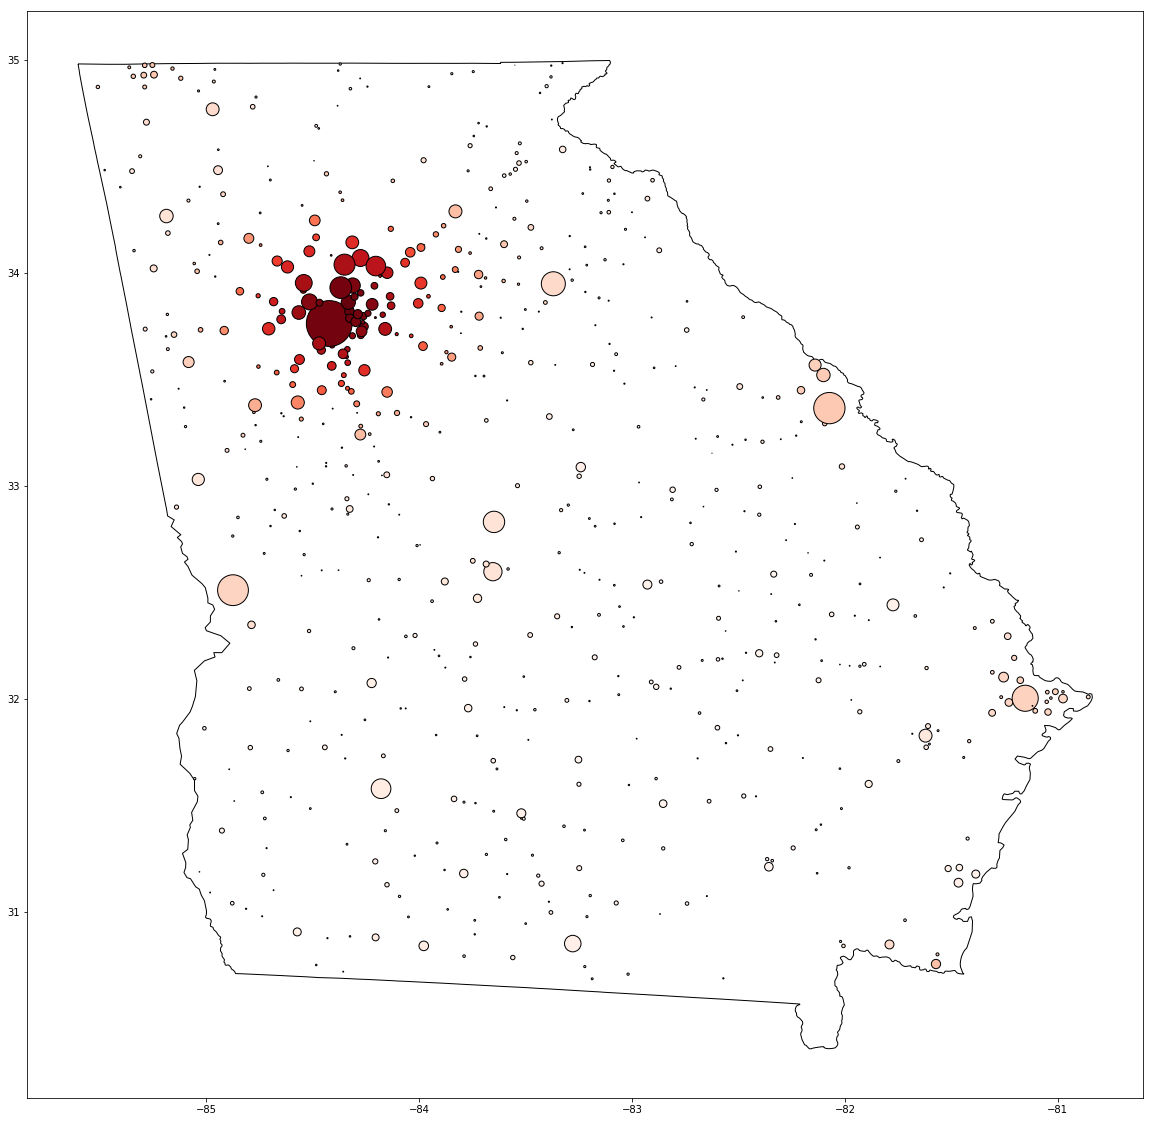

In [18]:
plot_state('GA')

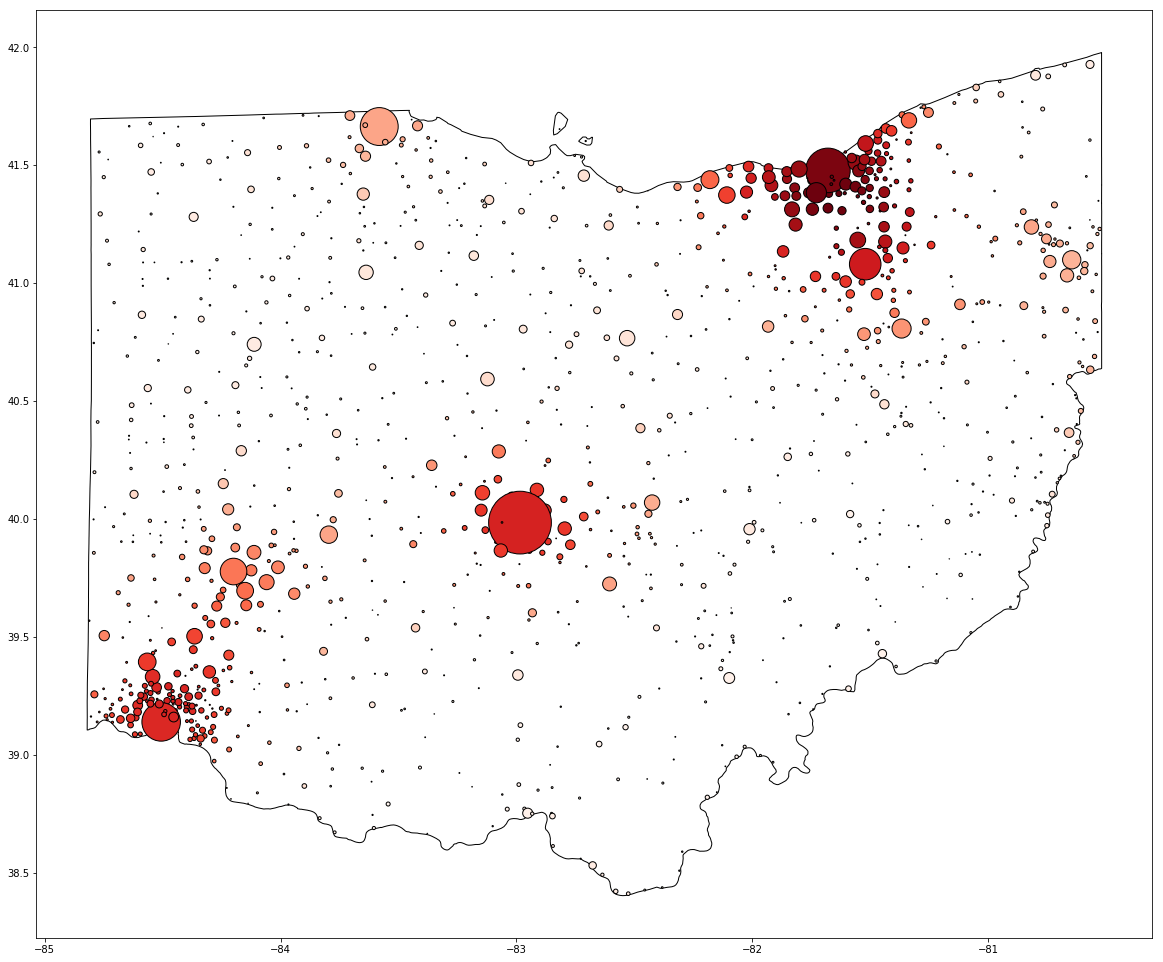

In [22]:
plot_state('OH')

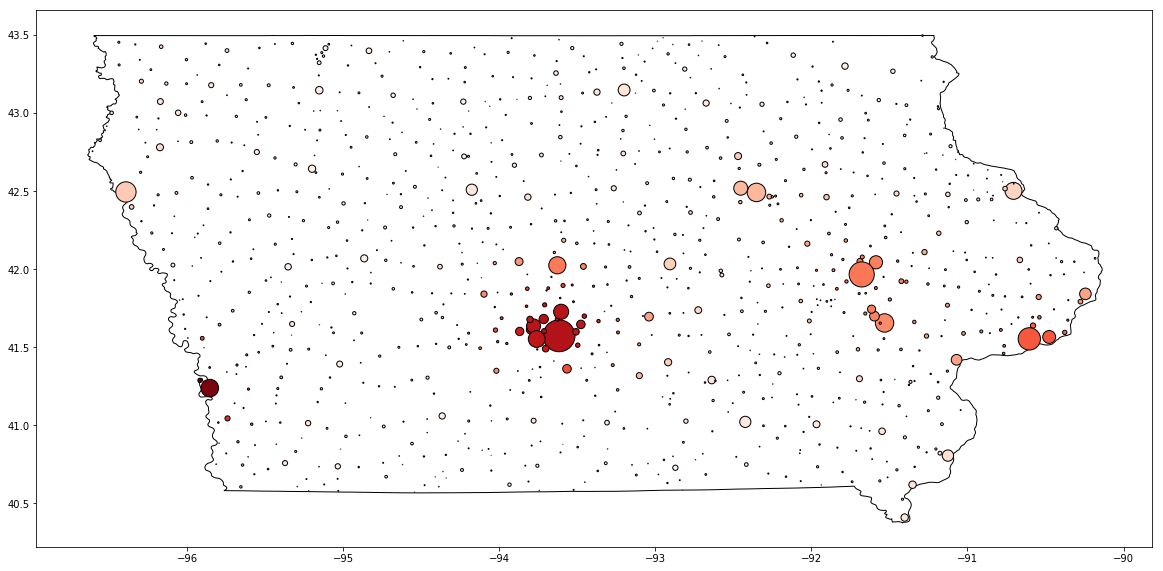

In [23]:
plot_state('IA')

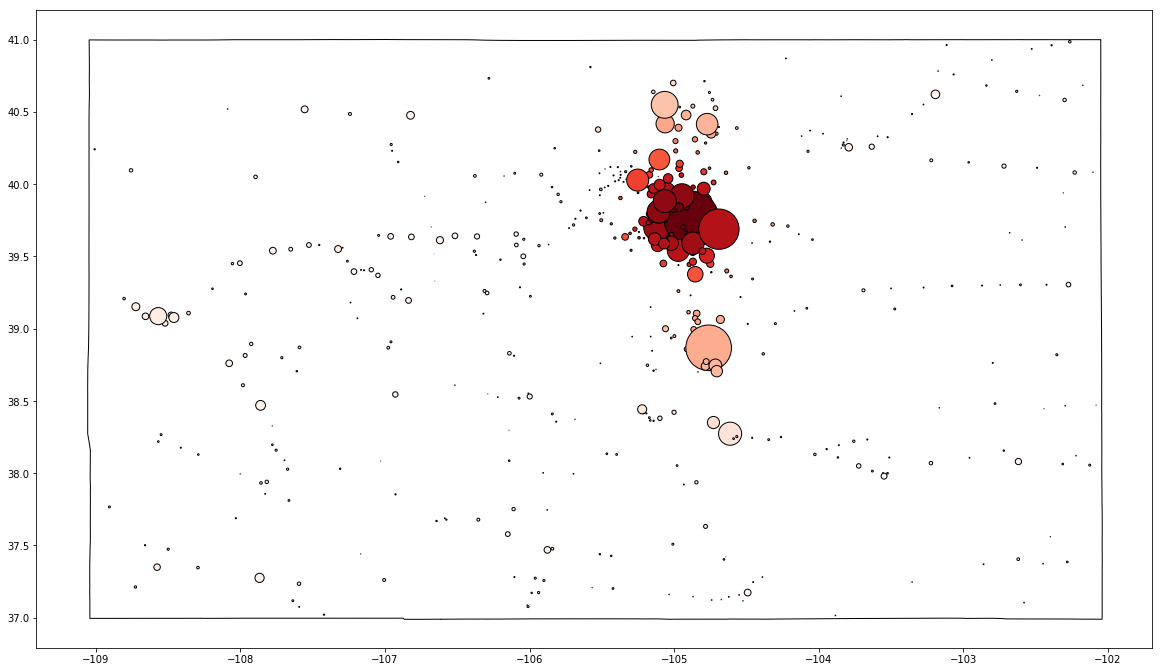

In [24]:
plot_state('CO')

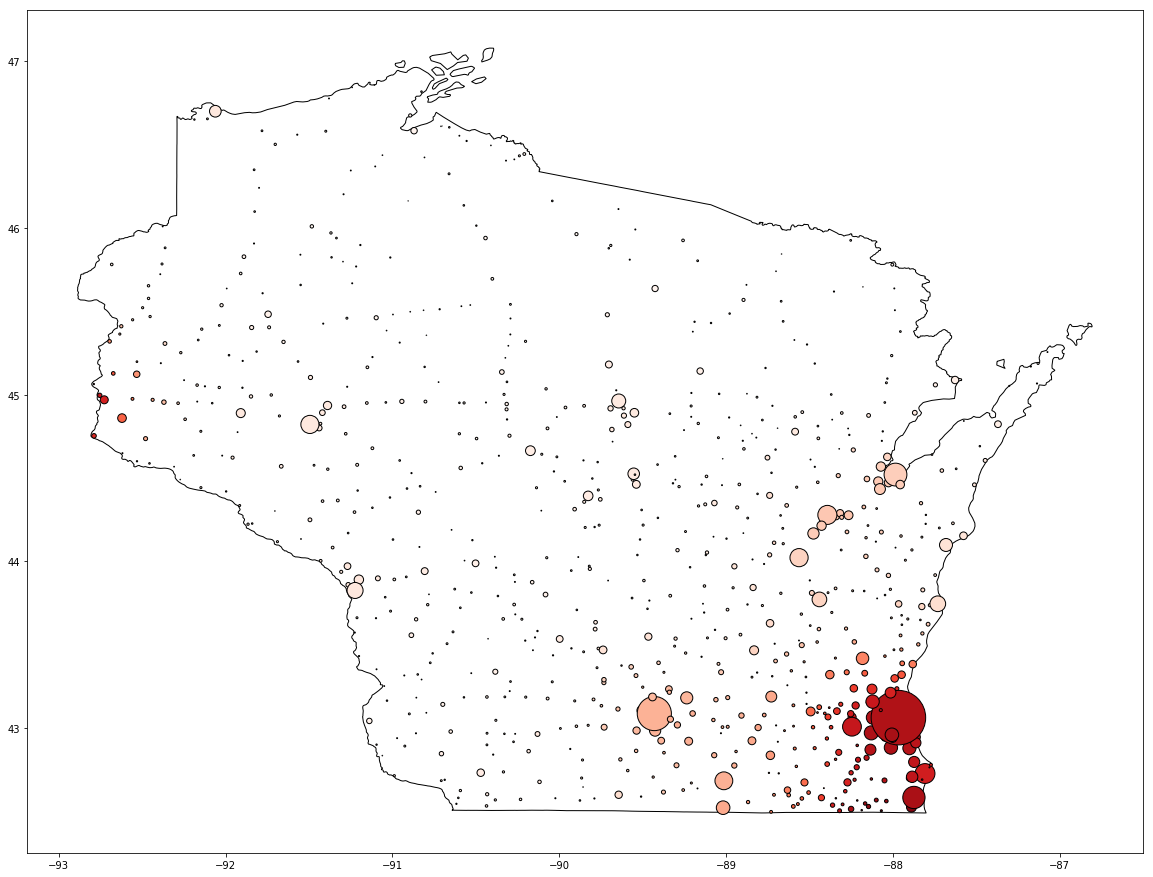

In [48]:
plot_state('WI')

In [25]:
df[(df.NAME.str.contains('New Haven')) & (df.USPS=='CT')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
12552,48377442,18.679,2378285,3744699,1.446,0.981606,A,952000,54967,41.310809,-72.924953,25,New Haven city,129779,CT,POINT (-72.924953 41.310809)


In [26]:
df[(df.NAME.str.contains('Birmingham')) & (df.USPS=='AL')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
29147,378310927,146.067,2403868,6590665,2.545,0.470393,A,107000,108981,33.527444,-86.799047,25,Birmingham city,212237,AL,POINT (-86.799047 33.527444)


In [49]:
df[(df.NAME.str.contains('Mobile')) & (df.USPS=='AL')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
22970,360290063,139.109,2404278,105344035,40.674,0.237559,A,150000,89127,30.668426,-88.100226,25,Mobile city,195111,AL,POINT (-88.10022600000001 30.668426)


In [37]:
df[(df.NAME.str.contains('Tahoe City')) & (df.USPS=='CA')]

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS,point
3801,8755038,3.38,2410030,0,0.0,0.138361,S,676015,2119,39.150413,-120.161364,57,Sunnyside-Tahoe City CDP,1557,CA,POINT (-120.161364 39.150413)


In [27]:
states_cont = [s.abbr for s in us.states.STATES_CONTIGUOUS]

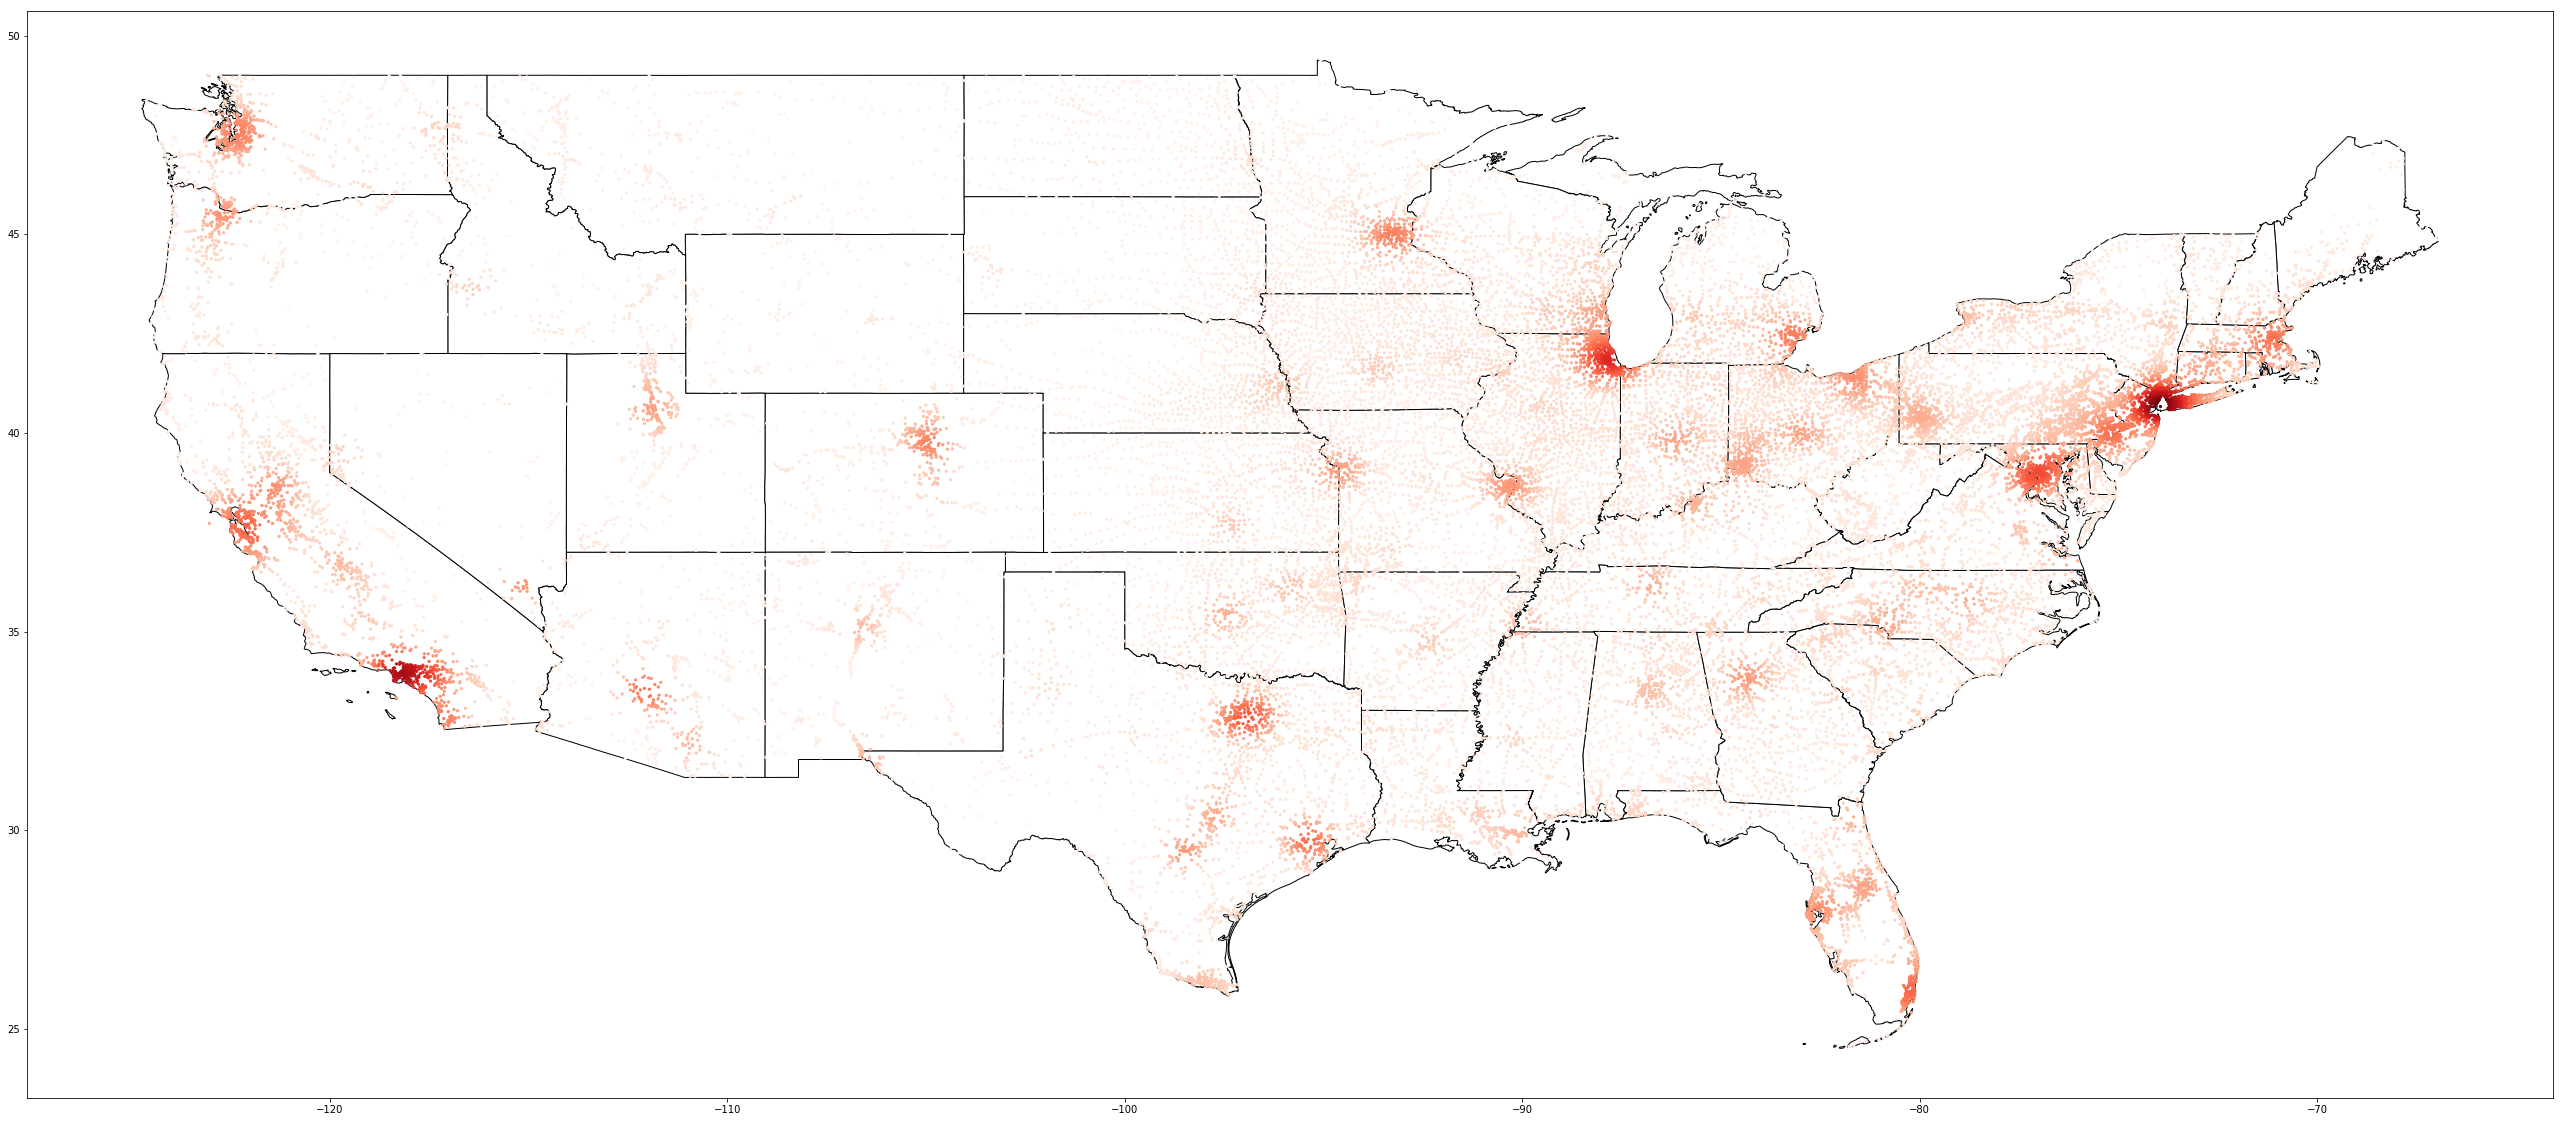

In [47]:
ax = states[states.STUSPS.isin(states_cont)].plot(color='white', edgecolor='black', figsize=(50,20))
sdf = gdf[gdf.USPS.isin(states_cont)]
plot_point_collection(ax, sdf.point, np.sqrt(sdf.DENSITY), markersize=5, cmap='Reds')